<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week13/blob/main/Mnist_cnn_w13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import library


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Optimizer
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

#2.Import file and load data

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [4]:
#handling data
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = x_train/255
x_test  = x_test/255

In [5]:
# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

#3.Create model 

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))#layer 1
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')) #layer2
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu')) #layer3
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

#4.Training

In [12]:
model.compile(optimizer= Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 64, epochs = 10,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1606 - accuracy: 0.9506 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1538 - accuracy: 0.9526 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1552 - accuracy: 0.9529 - val_loss: 0.0311 - val_accuracy: 0.9899
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1439 - accuracy: 0.9553 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1486 - accuracy: 0.9541 - val_loss: 0.0276 - val_accuracy: 0.9912
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1401 - accuracy: 0.9571 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1414 - accuracy: 0.9549 - val_loss: 0.0298 - val_accuracy: 0.9901
Epoch 

In [13]:
#save model
model_json = model.to_json()
with open('mnist_cnn.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('mnist_cnn.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


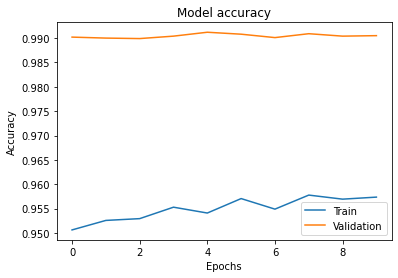

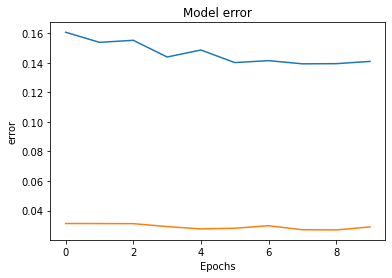

In [14]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()